In [1]:
import nltk

In [3]:
nltk.download('book',quiet=True)

True

In [5]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [6]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')

In [7]:
from nltk.tokenize import sent_tokenize ,word_tokenize, RegexpTokenizer

In [9]:
sent_tokenize(emma_raw[:1000])[0:2]
#문장으로 끊은것중 2번째것까지 가지고 와라.

['[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.',
 "She was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister's marriage,\nbeen mistress of his house from a very early period."]

In [14]:
word_tokenize(emma_raw[:10])

['[', 'Emma', 'by', 'J']

In [17]:
retokenize =RegexpTokenizer('[\w]+')
retokenize.tokenize(emma_raw[:10])

['Emma', 'by', 'J']

In [28]:
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [30]:
st1 = PorterStemmer()
lm= WordNetLemmatizer()

In [20]:
words=['fly','files','flying','flew','flown']

In [25]:
for w in words:
    print(st1.stem(w))

fli
file
fli
flew
flown


In [26]:
[st1.stem(w) for w in words]

['fli', 'file', 'fli', 'flew', 'flown']

In [31]:
[lm.lemmatize(w,pos='v') for w in words]

['fly', 'file', 'fly', 'fly', 'fly']

In [32]:
from nltk.tag import pos_tag

In [ ]:
# 품사( pos ,part of speech)sms 낱말을 문법적인 기능이나 형태 뜻에 따라 구분한 것이다.

# NNP: 단수 고유 명사
# VBP: 동사 진행형
# TO: to 전치사
# NN: 명사(단수형 혹은 집합형)
# DT: 관형사

In [34]:
sentence ='Emma refused to permit us to obtain the refuse permit'
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [35]:
from nltk import Text

In [36]:
text = Text(retokenize.tokenize(emma_raw))
text

<Text: Emma by Jane Austen 1816 VOLUME I CHAPTER...>

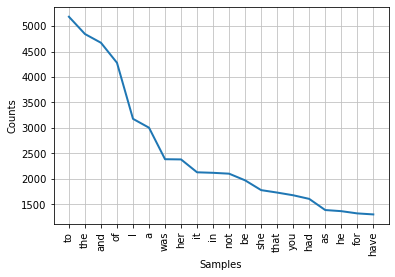

In [37]:
text.plot(20)

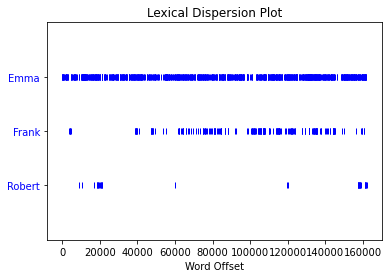

In [38]:
text.dispersion_plot(['Emma','Frank','Robert'])

In [40]:
ipod=open('ipod.txt')

In [42]:
ipod=ipod.read()

In [43]:
from nltk.tokenize import sent_tokenize ,word_tokenize, RegexpTokenizer

In [44]:
sent_tokenize(ipod[:1000])[0:2]

["##Don't get this...keep browsing.",
 '##The iPod has so far been one of the most advertised and populated MP3 players so far.']

In [45]:
word_tokenize(ipod[:10])

['#', '#', 'Do', "n't", 'ge']

In [46]:
retokenize =RegexpTokenizer('[\w]+')

In [47]:
retokenize.tokenize(ipod[:10])

['Don', 't', 'ge']

In [48]:
from nltk.stem import PorterStemmer,WordNetLemmatizer

In [51]:
text = Text(retokenize.tokenize(ipod))
text

<Text: Don t get this keep browsing The iPod...>

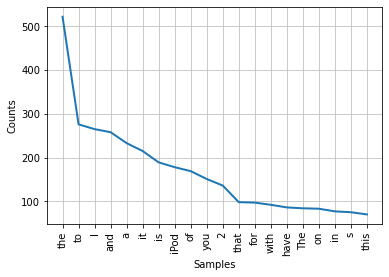

In [52]:
text.plot(20)

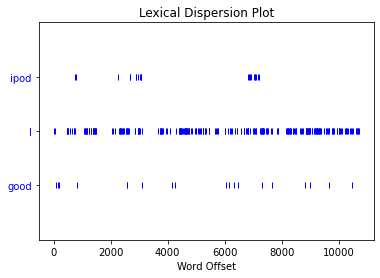

In [53]:
text.dispersion_plot(['ipod','I','good'])

In [56]:
from nltk import FreqDist
from nltk.tag import pos_tag

stopwords = ["Don", "of", "and", "t", "I", "m"]
ipod_tokens = pos_tag(retokenize.tokenize(ipod))

In [58]:
names_list = [t[0] for t in ipod_tokens if t[1] == "NN" and t[0] not in stopwords]
fd_names = FreqDist(names_list)
fd_names.N()

1626

In [59]:
fd_names.most_common(5)

[('iPod', 148), ('music', 46), ('battery', 45), ('player', 31), ('time', 22)]

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

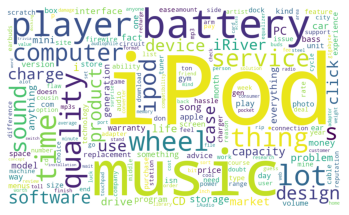

In [66]:
wc=WordCloud(width=1000, height=600, background_color='white',random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.axis('off')
plt.show()